In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
from content_based_filtering import hybrid

In [2]:
user_data = pd.read_csv(r'/Code/Fooder/random_dummy.csv', header=None, index_col=0)
dataset = pd.read_csv(r'/Code/Mini-Project/recipe_details_clean.csv')
tastes = dataset['Taste']
courses = dataset['Course']

## Taste

In [3]:
#Taste index creation 
taste_index = {
    'Mild' : 0, 
    'Spicy' : 1, 
    'Sweet' : 2,
    'Tangy' : 3,
    'Sweet & Sour' : 4,
    'Sour' : 5, 
    'Sweet and Sour' : 6,
    'Select Taste' : 7
    }

In [4]:
#Taste Vectors Creation
taste_vectors = []
for row in user_data.iterrows():
    taste_vector = [0 for i in range(8)]
    row = row[1][1].split('^')
    for item in row:
        taste_vector[taste_index[dataset.loc[dataset['Name'] == item, 'Taste'].values[0]]] += 1
    taste_vectors.append(taste_vector)
#uncomment this to see the vectors
    #print(taste_vector)

In [5]:
# Create a copy of the taste vectors
# One of elements will be selected randomly and it will be deleted from the list
copy_vectors = taste_vectors

In [6]:
# Run the cell right above this first
# Select a random target vector for testing purposes
# Perform a similarity search between target and all other user-vectors and find the most similar ones
id = np.random.randint(0,10000)
target_vector = copy_vectors[id]
del copy_vectors[id]
vectors = []
for i in range(len(copy_vectors)):
    vectors.append((i, cosine_similarity(np.array(target_vector).reshape(1,-1), np.array(copy_vectors[i]).reshape(1,-1))))
sorted_vectors = sorted(vectors, key = lambda x:x[1], reverse=True)[0:10]
print(sorted_vectors)
#print(cosine_similarity())

[(4790, array([[1.]])), (5222, array([[1.]])), (8205, array([[1.]])), (8430, array([[1.]])), (8992, array([[1.]])), (1714, array([[0.99833749]])), (2916, array([[0.99833749]])), (5232, array([[0.99833749]])), (5656, array([[0.99833749]])), (8563, array([[0.99833749]]))]


In [7]:
#Find the recipes likes by users in sorted_vectors 
dishes_liked_by_others = set()
for i in sorted_vectors:
    dishes = str(user_data.loc[i[0]][1]).split('^')
    for dish in dishes:
        dishes_liked_by_others.add(dish)
    #dishes_liked_by_others.extend(list(enumerate(dishes)))
print(dishes_liked_by_others)

{'Prawn Biryani - SK Khazana', 'Keema Matar Quiche', 'Lavang Latika', 'Burani', 'Palak Paneer Parantha-SK Khazana', 'Cauliflower Rice - SK Khazana', 'Pomfret Recheado', 'Spinach Fried Rice', 'Fried Calamari', 'Mug Cake', 'Chole Soya Curry', 'Sour Cream', 'Fruit Bread Pudding for Christmas', 'Gulkand Sitaphal Milkshake', 'Dahi Vada', 'Green Peas Mash', 'Keema Kachori - SK Khazana', 'Prawns Puli Munchi', 'Green Tea Cake with White Chocolate Frosting', 'Phool Makhana Munchies', 'Chicken Steak - SK Khazana', 'Kesari Indrayani', 'Gujarati Puran Poli - SK Khazana', 'How to boil Pasta', 'Roasted Fish with Tomato Mint Salsa', 'French Toast', 'Chicken Kathi Kebab - SK Khzana', 'Chutney Grilled Tiger Prawns - SK Khazana', 'Moong Dal Papad', 'Secret Noodles', 'Mawa Gujiya', 'Jago Soya Toast', 'Paneer Tawa Masala', 'Instant Coconut Laddoo', 'Thai Style Noodle Salad-Cook Smart', 'Thai Fried Rice - SK Khazana', 'Beer Batter Amritsari Fish Pakoda - SK Khazna', 'Saeb Makhane ki Kheer', 'Methi Matar Ma

In [8]:
# Testing if the hybrid system will actually work
target = str(user_data.loc[id][1]).split('^')
print(f'User input -> {target}')
print('Finding recos')
print(f'Reccoomended dishes -> {hybrid(target + list(dishes_liked_by_others), dishes_liked_by_others)}')

User input -> ['Bittersweet Chocolate Gateaux', 'Dosa Waffles', 'Eggs Spinach Wrap', 'Baked Cheesecake', 'Mixed Vegetable Parantha', 'Chocoliest Brownies', 'Warm Thai Noodle And Papaya Salad', 'Singhada aur Hare Matar ki Subzi', 'Chicken Makhani', 'Cheesy Chicken Bites', 'Adraki Imliwale Prawns', 'Baingan Chips', 'Mutton Saag Wala']
Finding recos
Reccoomended dishes -> {'Singhada aur Hare Matar ki Subzi', 'Baked Cheesecake', 'Chicken Steak - SK Khazana', 'Roasted Fish with Tomato Mint Salsa', 'Mixed Vegetable Parantha', 'Chilli Garlic Chutney', 'Secret Noodles', 'Chicken Lollipop', 'Bittersweet Chocolate Gateaux'}


### Plots that make no sense

In [ ]:
#Converting the vectors into plot friendly data
x, y, z, m, n, o, p, q = [],[],[],[],[],[],[],[]
for vector in taste_vectors:
    x.append(vector[0])
    y.append(vector[1])
    z.append(vector[2])
    m.append(vector[3])
    n.append(vector[4])
    o.append(vector[5])
    p.append(vector[6])
    q.append(vector[7])


In [ ]:
#5D plot. Doesn't show the full picture as the actual data is 8D. 
#Using scale and color as the 4th and 5th dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
sc = ax.scatter(x,y,z,c=m, s=n,  cmap='viridis',alpha=0.6)
plt.colorbar(sc)
plt.show()

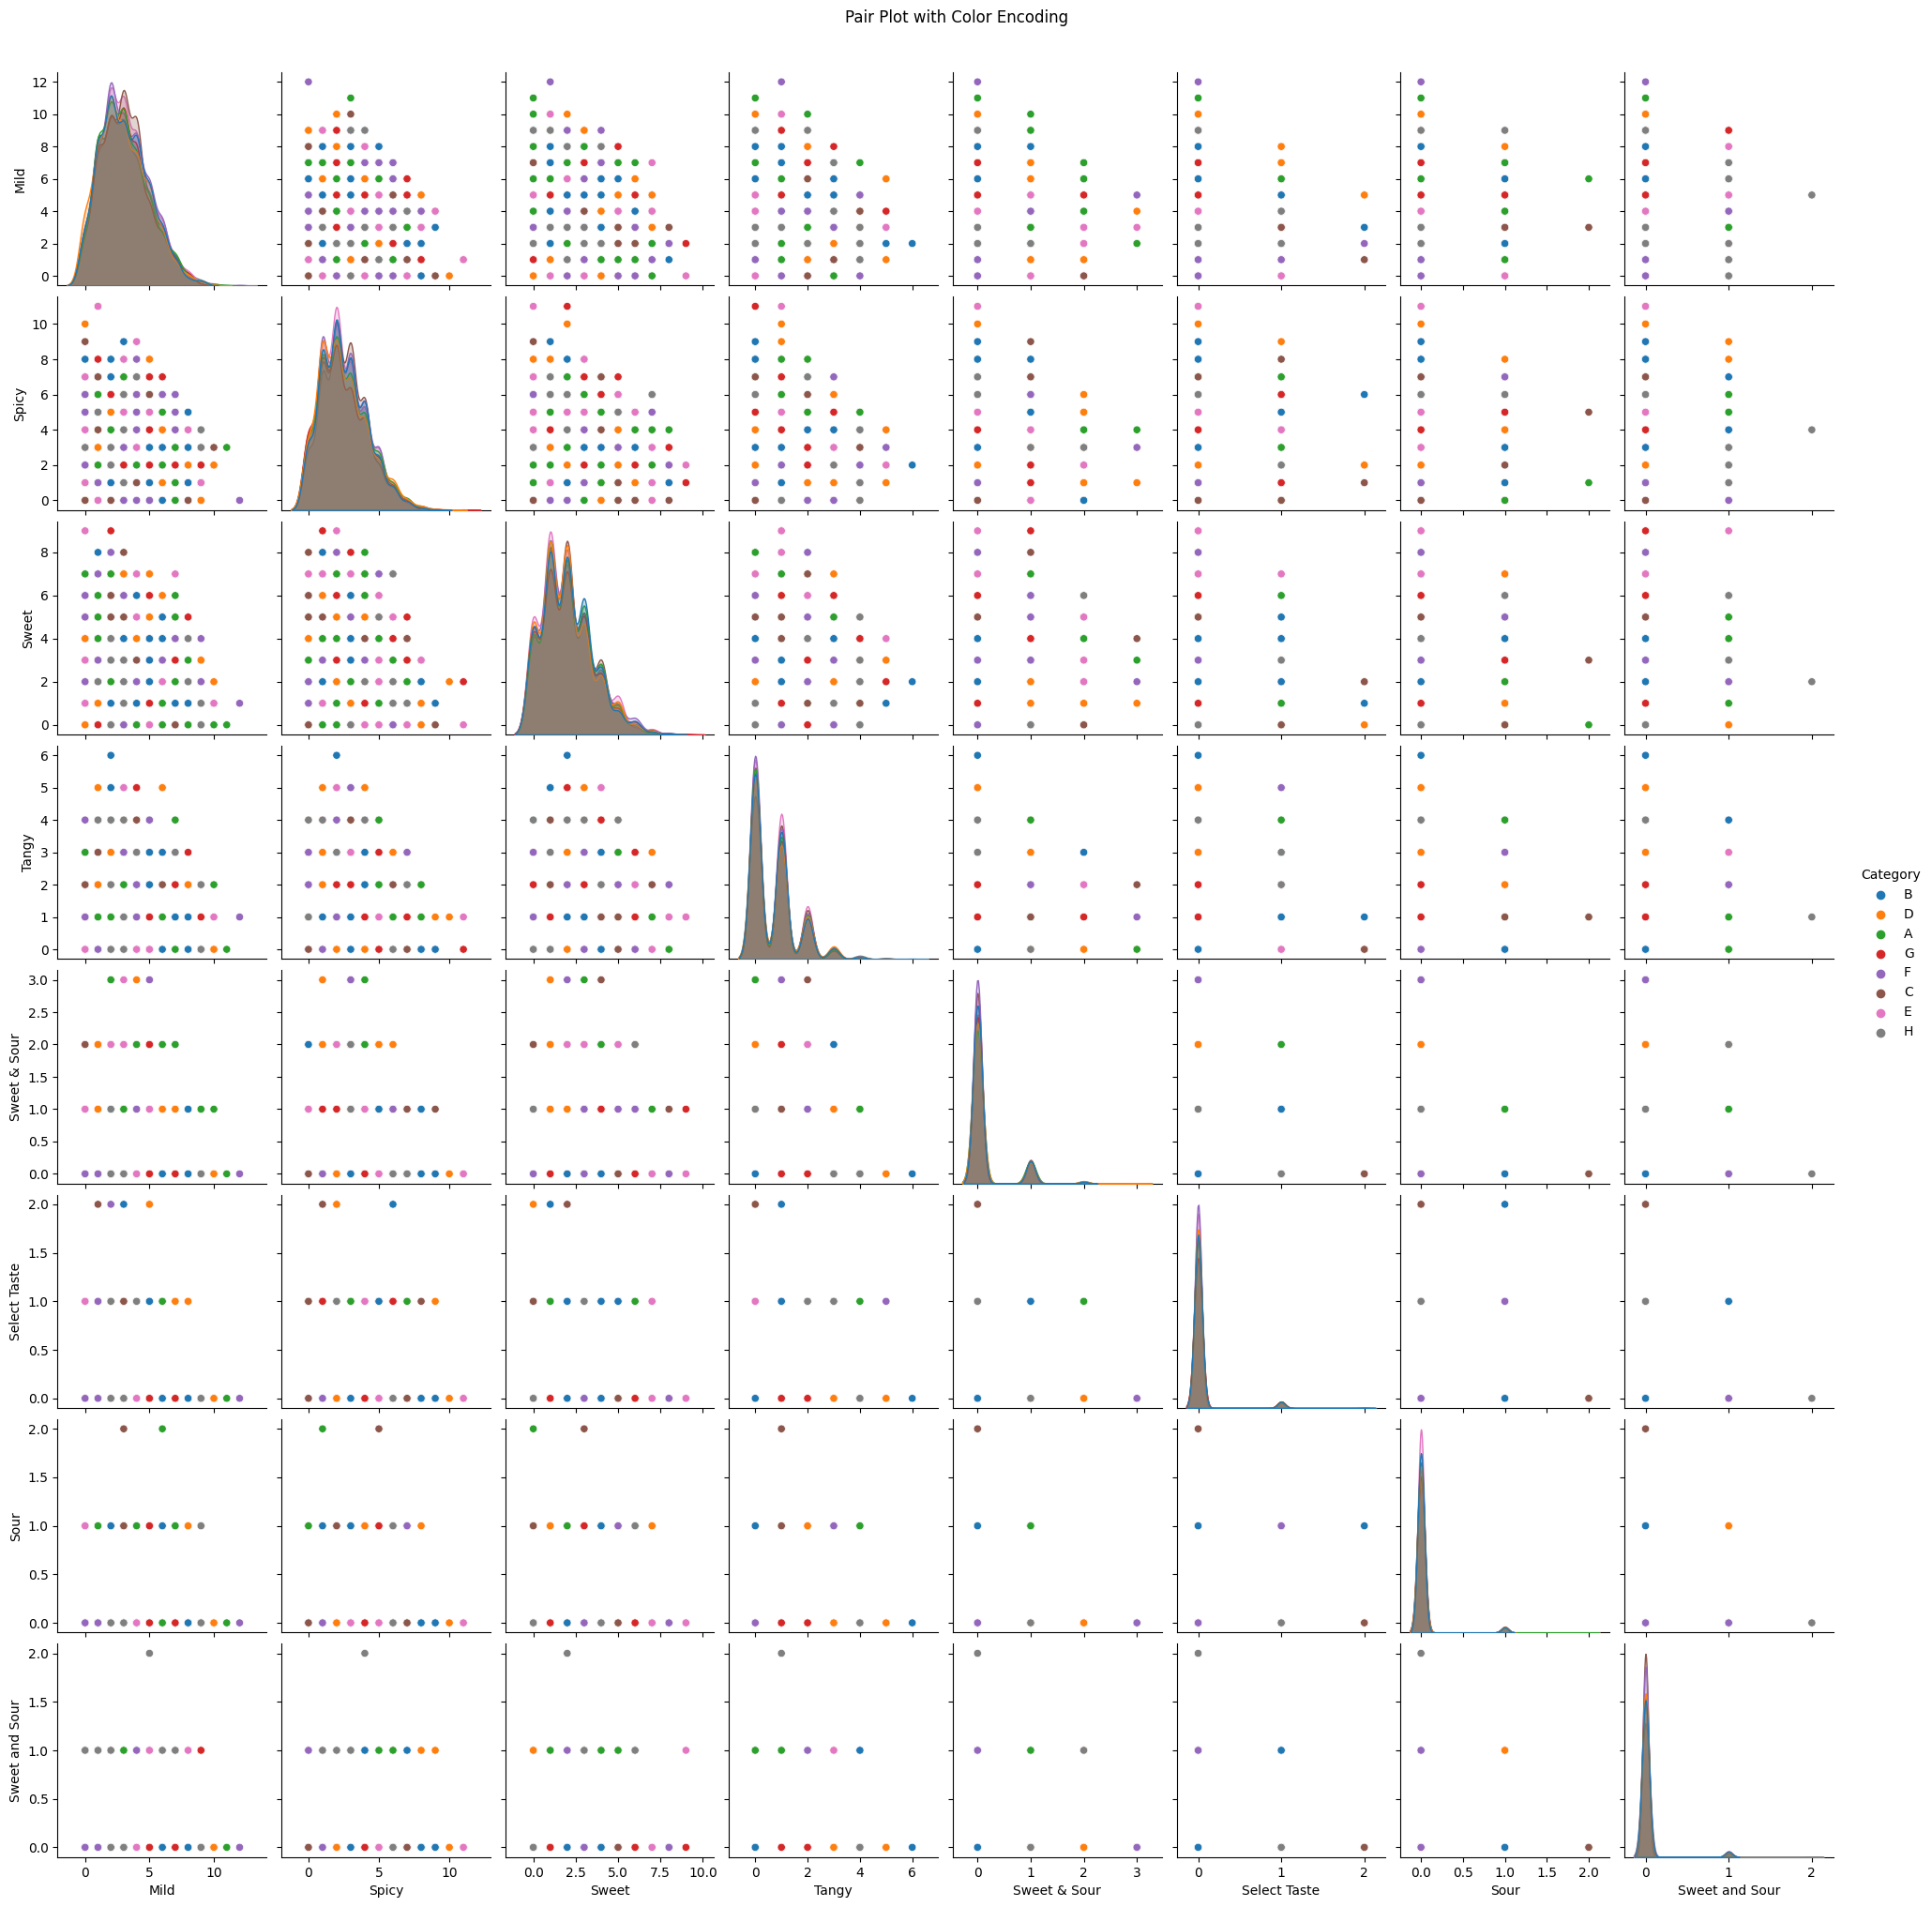

In [121]:
#Pairwise plot
#Don't really know what this plot means
import seaborn as sns

data = pd.DataFrame({
    'Mild': x,
    'Spicy': y,
    'Sweet': z,
    'Tangy': m,
    'Sweet & Sour': n,
    'Select Taste': o,
    'Sour': p,
    'Sweet and Sour': q,
    'Category': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], size=10000)  # categorical for hue
})
#d = pd.DataFrame(columns=['Mild', 'Spicy', 'Sweet', 'Tangy', 'Sweet & Sour', 'Select Taste', 'Sweet and Sour'],data=[x,y,z,c,s] )
# Pair Plot with Color Encoding
sns.pairplot(data, hue='Category', palette='tab10')
plt.suptitle('Pair Plot with Color Encoding', y=1.02)
plt.show()
